In [111]:
pip install tftb

Note: you may need to restart the kernel to use updated packages.


In [112]:
from scipy.io.arff import loadarff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
import tftb

In [2]:
data = loadarff('C:/Users/kelvi/Documents/Studium/Master/6.Semester/Time_Series_Prediction/InsectSound/InsectSound/InsectSound.arff')
df = pd.DataFrame(data[0])

In [6]:
T_timeseries=0.1 #second
f_timeseries=6000 #Hz
Time=np.arange(0,T_timeseries,1/f_timeseries) #time in seconds

#example timeseries
n_example=0
data_example=np.array(df.iloc[n_example, :-1])
type_example=df.iloc[n_example, -1]

print(type_example)

b'Aedes_female'


Waveform

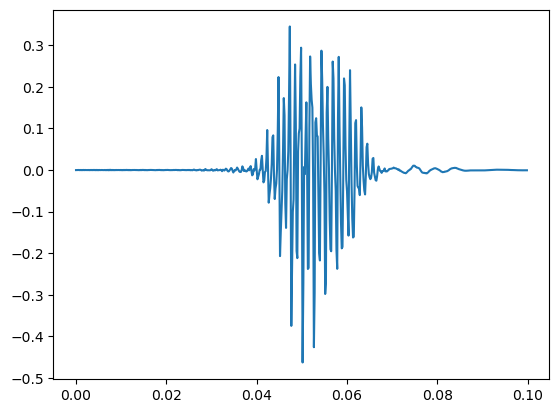

In [8]:
plt.plot(Time, data_example)

Fourier-Transform

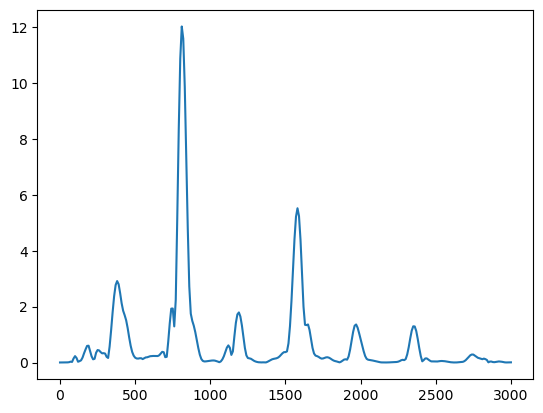

In [9]:
fourier=np.absolute(np.fft.rfft(data_example))
frequencies=np.fft.rfftfreq(len(data_example), d=1/f_timeseries)

plt.plot(frequencies, fourier)

Short Time Fourier Fransform (SFTF)
https://stackoverflow.com/questions/49676072/plotting-wigner-ville-distribution-with-pytftb-on-python-3

Text(0.5, 0, 'Time [sec]')

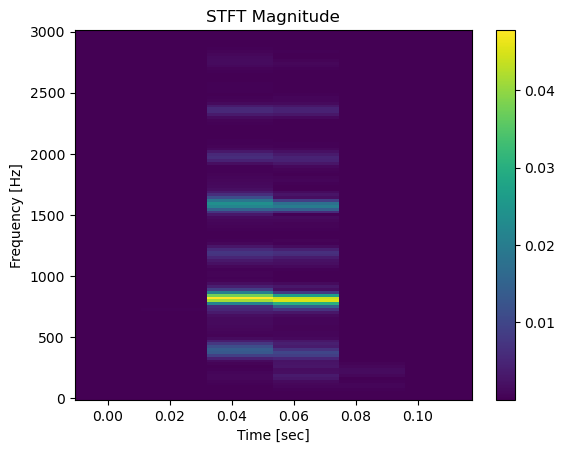

In [106]:
f_stft, t_stft, Zxx=sig.stft(data_example, f_timeseries) #optionaly add nperseg=...
magnitude_Zxx = np.abs(Zxx).astype(float)
plt.pcolormesh(t_stft, f_stft, magnitude_Zxx)
plt.colorbar()
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

Wigner-Ville Transform (WVT)
https://stackoverflow.com/questions/49676072/plotting-wigner-ville-distribution-with-pytftb-on-python-3

Text(0.5, 0, 'Time [sec]')

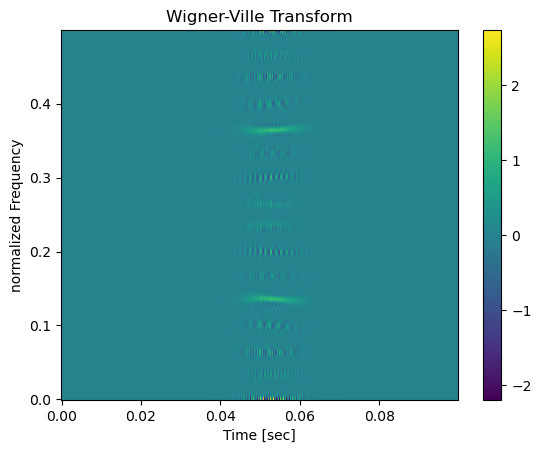

In [120]:
wvd = tftb.processing.WignerVilleDistribution(data_example, timestamps=Time)
tfr_wvd, t_wvd, f_wvd = wvd.run()

#wvd.plot() #optional kind='contour'
plt.pcolormesh(t_wvd, f_wvd, tfr_wvd)
plt.colorbar()
plt.title('Wigner-Ville Transform')
plt.ylabel('normalized Frequency')
plt.xlabel('Time [sec]')